## MSA 8010 - Exercises


### Session 10: K-Means

**Q:** Considering only `sepal_length`, and `sepal_width`, find the best $K$ for the following dataset, and perform a K-Means clustering.

In [1]:
import pandas as pd
data = pd.read_csv('IRIS-modified.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Answer:**

In [2]:
X = data[["sepal_length","sepal_width"]].values

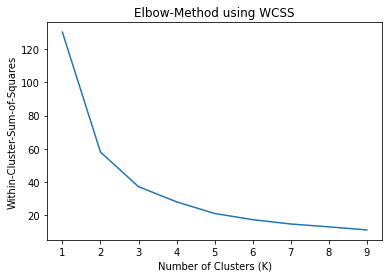

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

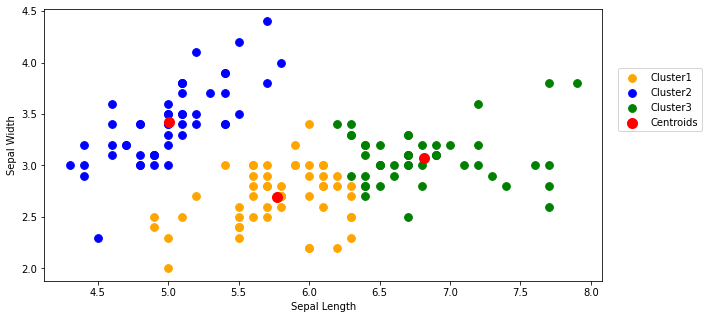

In [5]:
plt.figure(figsize=(10, 5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'orange', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width') 
plt.legend(bbox_to_anchor = (1.02, 0.8))

plt.show()

### Session 10: Metrics

**Q:** Considering the following values, show:
- Accuracy
- Precision
- Recall
- F1-Score

In [6]:
from sklearn.metrics import confusion_matrix

# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]

# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]

y_true = act_pos + act_neg
y_pred = pred_pos + pred_neg
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(9970, 30, 10, 90)

**Answer:**
There are two methods:
- Manually calculating values
- Using sklearn's `accuracy_score`, `precision_score`, `recall_score`, `f1_score`.
    - It is especially useful if the problem is not a binary classification.

In [7]:
# The manual method:

accuracy = (tn+tp) / (tp+tn+fp+fn)
print('Accuracy:', accuracy)

precision = (tp)/(tp+fp)
print('Precision:', precision)

recall = (tp)/(tp+fn)
print('Recall:', recall)

f1score = 2*(precision*recall)/(precision+recall)
print('F1 Score:', f1score)

Accuracy: 0.996039603960396
Precision: 0.75
Recall: 0.9
F1 Score: 0.8181818181818182


In [8]:
# Using sklearn's library:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true,y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_true, y_pred)
print('Precision:', precision)

recall = recall_score(y_true, y_pred)
print('Recall:', recall)

f1score = f1_score(y_true, y_pred)
print('F1 Score:', f1score)

Accuracy: 0.996039603960396
Precision: 0.75
Recall: 0.9
F1 Score: 0.8181818181818182


### Session 10: Deep Learning

**Q:** 
1. Build a deep neural network to predict if a persoan has diabetes or not. 
    - The "outcome" column contains either `1` for diabetes, and `0` for not.
2. Show the confusion matrix values.

In [9]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

**Answer:**

In [10]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.model_selection import train_test_split

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
def getModel(arr):
    model = Sequential()

    model.add(Dense(arr[0], input_dim=arr[0], activation='relu'))  # Input layer
    for layer in range(1, len(arr) - 1):
        model.add(Dense(arr[layer], activation='relu'))  # Hidden layer(s)
    model.add(Dense(arr[-1], activation="sigmoid"))  # Output layer

    model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
    return model

In [12]:
#divide dataset into training set, cross validation set, and test set
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model=getModel([8,40,1])
model.fit(np.array(trainX), np.array(trainY), epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 680us/step - loss: 4.8438 - accuracy: 0.6384
Epoch 2/100
20/20 [==============================] - 0s 630us/step - loss: 1.6051 - accuracy: 0.4870
Epoch 3/100
20/20 [==============================] - 0s 675us/step - loss: 1.2098 - accuracy: 0.5391
Epoch 4/100
20/20 [==============================] - 0s 682us/step - loss: 1.0060 - accuracy: 0.5358
Epoch 5/100
20/20 [==============================] - 0s 681us/step - loss: 0.8890 - accuracy: 0.5879
Epoch 6/100
20/20 [==============================] - 0s 629us/step - loss: 0.8032 - accuracy: 0.5961
Epoch 7/100
20/20 [==============================] - 0s 630us/step - loss: 0.7734 - accuracy: 0.6026
Epoch 8/100
20/20 [==============================] - 0s 630us/step - loss: 0.7116 - accuracy: 0.6319
Epoch 9/100
20/20 [==============================] - 0s 629us/step - loss: 0.7364 - accuracy: 0.5782
Epoch 10/100
20/20 [==============================] - 0s 630us/step - loss: 0.6755 - accura

20/20 [==============================] - 0s 621us/step - loss: 0.5290 - accuracy: 0.7280
Epoch 82/100
20/20 [==============================] - 0s 630us/step - loss: 0.5336 - accuracy: 0.7296
Epoch 83/100
20/20 [==============================] - 0s 682us/step - loss: 0.5337 - accuracy: 0.7345
Epoch 84/100
20/20 [==============================] - 0s 684us/step - loss: 0.5242 - accuracy: 0.7362
Epoch 85/100
20/20 [==============================] - 0s 681us/step - loss: 0.5336 - accuracy: 0.7280
Epoch 86/100
20/20 [==============================] - 0s 630us/step - loss: 0.5218 - accuracy: 0.7345
Epoch 87/100
20/20 [==============================] - 0s 681us/step - loss: 0.5277 - accuracy: 0.7378
Epoch 88/100
20/20 [==============================] - 0s 630us/step - loss: 0.5215 - accuracy: 0.7280
Epoch 89/100
20/20 [==============================] - 0s 682us/step - loss: 0.5264 - accuracy: 0.7394
Epoch 90/100
20/20 [==============================] - 0s 630us/step - loss: 0.5321 - accuracy: 

In [14]:
predY = model.predict(np.array(testX))
predY = np.round(predY).astype(int).reshape(1,-1)[0]

In [15]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
print(f"TN={tn}, FN={fn}, FP={fp}, TP={tp}")

TN=91, FN=38, FP=8, TP=17


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true,y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_true, y_pred)
print('Precision:', precision)

recall = recall_score(y_true, y_pred)
print('Recall:', recall)

f1score = f1_score(y_true, y_pred)
print('F1 Score:', f1score)

Accuracy: 0.996039603960396
Precision: 0.75
Recall: 0.9
F1 Score: 0.8181818181818182
